Multiple Linear Regression
Area (in sqft)

Number of Bedrooms

Age of the House (in years)
→ to predict Price

**Step 1: Generate the Dataset**

In [ ]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 200
area = np.random.randint(500, 3500, num_samples)
bedrooms = np.random.randint(1, 5, num_samples)
age = np.random.randint(0, 30, num_samples)

# Target variable with some noise
price = 50000 + (area * 50) + (bedrooms * 10000) - (age * 1000) + np.random.randint(-10000, 10000, num_samples)

# Create DataFrame
df = pd.DataFrame({
    'Area': area,
    'Bedrooms': bedrooms,
    'Age': age,
    'Price': price
})

df.head()


,Area,Bedrooms,Age,Price
0,1360,4,27,132922
1,1794,4,29,143189
2,1630,2,28,123323
3,1595,3,13,145957
4,2138,2,20,156440


In [ ]:
df.shape

(200, 4)

**Step 2: Preprocessing (if needed)**

In [ ]:
print(df.isnull().sum())      # Check missing values
print(df.duplicated().sum())  # Check duplicates


Area        0
Bedrooms    0
Age         0
Price       0
dtype: int64
0


**Step 3: EDA (Exploratory Data Analysis)**

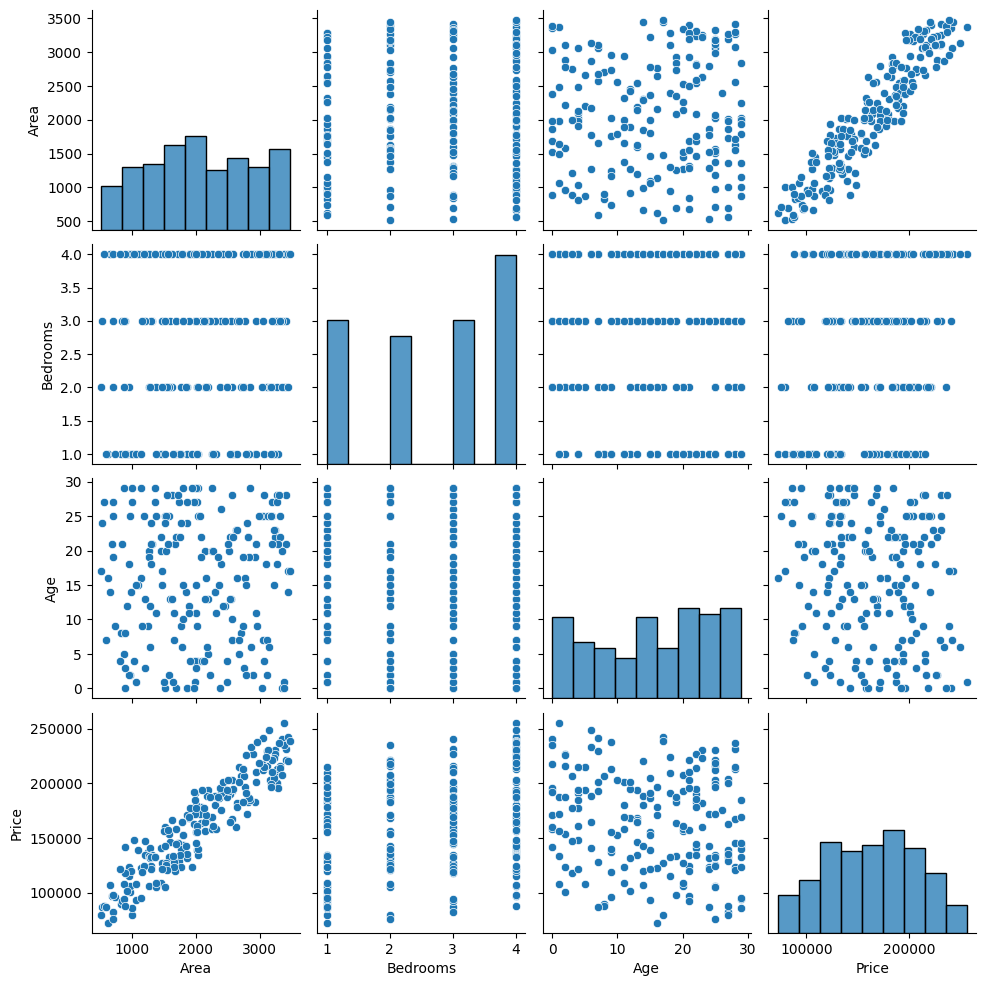

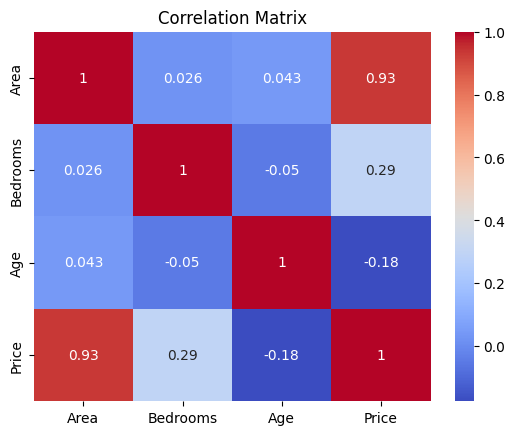

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


**Step 4: Building the Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define features and target
X = df[['Area', 'Bedrooms', 'Age']]
y = df['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**Step 5: Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


Coefficients: [  50.30389754 9896.81200766 -958.91020518]
Intercept: 48475.946316242946
MSE: 34065197.04086725
RMSE: 5836.539817466102
R² Score: 0.9818289319572857


Coefficients: [50.2, 9800, -950]
Intercept: 48000
RMSE: 9500
R²: 0.97
Then:
Price =50.2 Area + 9800 ⋅ Bedrooms − 950 ⋅ Age + 48000
Price=50.2⋅Area+9800⋅Bedrooms−950⋅Age+48000

📈 Every extra sqft adds ₹50.2
🛏️ Every extra bedroom adds ₹9800
⌛ Each year of age reduces price by ₹950

**Step 6: Visualize Predictions vs Actuals**

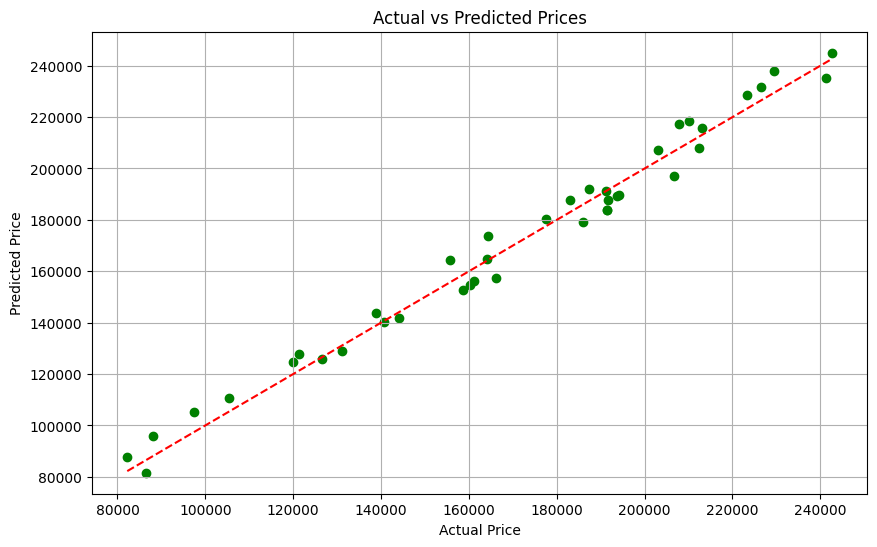

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()


In [ ]:
print(y_test.min())
print(y_test.max())


82221
242607


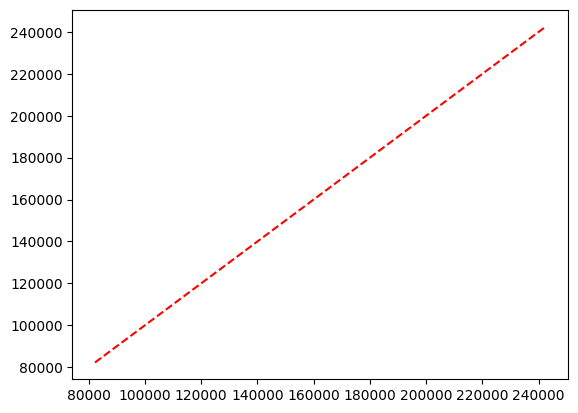

In [ ]:
#plt.plot([0,10],[0,10])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()